# Pandas

In [1]:
import pandas as pd

In [18]:
data = {
    'Pais': ['Belgica', 'India', 'Brasil'],
    'Capital': ['Bruxelas', 'Nova Delhi', 'Brasilia'],
    'Populacao': [12312, 4343345435, 854521],
    'Classificacao': [1, 3, 3]
}
df = pd.DataFrame(data, 
                  columns=['Pais', 'Capital', 'Populacao', 'Classificacao'])

In [19]:
df.head()

,Pais,Capital,Populacao,Classificacao
0,Belgica,Bruxelas,12312,1
1,India,Nova Delhi,4343345435,3
2,Brasil,Brasilia,854521,3


In [10]:
print("Tipo do Dataframe:",type(df))
print("Tipo do Pais:", df.Pais.dtype)
print(df.dtypes)

Tipo do Dataframe: <class 'pandas.core.frame.DataFrame'>
Tipo do Pais: object
Pais             object
Capital          object
Populacao         int64
Classificacao     int64
dtype: object


In [13]:
print('Lin e Cols:', df.shape)
print('Descr index:', df.index)
print('Cols:', df.columns)

Lin e Cols: (3, 4)
Descr index: RangeIndex(start=0, stop=3, step=1)
Cols: Index(['Pais', 'Capital', 'Populacao', 'Classificacao'], dtype='object')


In [23]:
df.loc[df['Populacao'] < 5000000]

,Pais,Capital,Populacao,Classificacao
0,Belgica,Bruxelas,12312,1
2,Brasil,Brasilia,854521,3


In [24]:
print('Contagem:', df.count())

Contagem: Pais             3
Capital          3
Populacao        3
Classificacao    3
dtype: int64


In [27]:
print('Classificacao:', pd.value_counts(df['Classificacao']))
df.Classificacao.value_counts()

Classificacao: Classificacao
3    2
1    1
Name: count, dtype: int64


Classificacao
3    2
1    1
Name: count, dtype: int64

In [28]:
df.describe()

,Populacao,Classificacao
count,3.000000e+00,3.000000
mean,1.448071e+09,2.333333
std,2.507381e+09,1.154701
min,1.231200e+04,1.000000
25%,4.334165e+05,2.000000
50%,8.545210e+05,3.000000
75%,2.172100e+09,3.000000
max,4.343345e+09,3.000000


In [34]:
df.sum()

Pais                     BelgicaIndiaBrasil
Capital          BruxelasNova DelhiBrasilia
Populacao                        4344212268
Classificacao                             7
dtype: object

In [35]:
df.min()

Pais              Belgica
Capital          Brasilia
Populacao           12312
Classificacao           1
dtype: object

In [36]:
df.max()

Pais                  India
Capital          Nova Delhi
Populacao        4343345435
Classificacao             3
dtype: object

In [37]:
df.Pais.unique()

array(['Belgica', 'India', 'Brasil'], dtype=object)

## Modificações do DataFrame

In [39]:
# Criar nova coluna
df['IDH'] = None
df['IDH'] = pd.DataFrame({"IDH": [True]})
df

,Pais,Capital,Populacao,Classificacao,IDH
0,Belgica,Bruxelas,12312,1,True
1,India,Nova Delhi,4343345435,3,NaN
2,Brasil,Brasilia,854521,3,NaN


In [48]:
dfd = pd.DataFrame({
    'A': [1, 0, 1, 0],
    'B': [1, 1, 0, 0]},
    index=list('abcd')
)
dfd

,A,B
a,1,1
b,0,1
c,1,0
d,0,0


In [44]:
dfd.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [49]:
dfd = dfd.rename(columns={'A': 'Tipo Sanguineo A'})
dfd = dfd.rename(columns={'B': 'Tipo Sanguineo B'})
dfd

,Tipo Sanguineo A,Tipo Sanguineo B
a,1,1
b,0,1
c,1,0
d,0,0


In [51]:
df

,Pais,Capital,Populacao,Classificacao,IDH
0,Belgica,Bruxelas,12312,1,True
1,India,Nova Delhi,4343345435,3,NaN
2,Brasil,Brasilia,854521,3,NaN


In [54]:
df1 = df
df1

,Pais,Capital,Populacao,Classificacao,IDH
0,Belgica,Bruxelas,12312,1,True
1,India,Nova Delhi,4343345435,3,NaN
2,Brasil,Brasilia,854521,3,NaN


In [55]:
# Remoção
df.drop([0,1])

,Pais,Capital,Populacao,Classificacao,IDH
2,Brasil,Brasilia,854521,3,NaN


In [57]:
df.drop('Pais',axis=1)

,Capital,Populacao,Classificacao,IDH
0,Bruxelas,12312,1,True
1,Nova Delhi,4343345435,3,NaN
2,Brasilia,854521,3,NaN


In [58]:
df = df.drop('IDH',axis=1)

In [62]:
df

,Pais,Capital,Populacao,Classificacao,IDH
0,Belgica,Bruxelas,12312,1,True
1,India,Nova Delhi,4343345435,3,NaN
2,Brasil,Brasilia,854521,3,NaN


In [63]:
# Tratar Valores Nulos

In [64]:
df.isna().sum()

Pais             0
Capital          0
Populacao        0
Classificacao    0
IDH              2
dtype: int64

In [65]:
df.dropna(axis=1)

,Pais,Capital,Populacao,Classificacao
0,Belgica,Bruxelas,12312,1
1,India,Nova Delhi,4343345435,3
2,Brasil,Brasilia,854521,3


In [66]:
df.dropna(axis=0)

,Pais,Capital,Populacao,Classificacao,IDH
0,Belgica,Bruxelas,12312,1,True


In [67]:
df['IDH'] = df.IDH.fillna('n/A')
df

,Pais,Capital,Populacao,Classificacao,IDH
0,Belgica,Bruxelas,12312,1,True
1,India,Nova Delhi,4343345435,3,n/A
2,Brasil,Brasilia,854521,3,n/A


#### Condicionais

In [70]:
print('Simples Condição')
df.loc[df.Capital == 'Brasilia']

Simples Condição


,Pais,Capital,Populacao,Classificacao,IDH
2,Brasil,Brasilia,854521,3,n/A


In [79]:
print('Condição Composta')
df.loc[(df.Populacao > 800000) & (df.Capital == 'Brasilia')]

Condição Composta


,Pais,Capital,Populacao,Classificacao,IDH
2,Brasil,Brasilia,854521,3,n/A


In [80]:
df.loc[(df.Populacao > 800000) | (df.Capital == 'Brasilia')]

,Pais,Capital,Populacao,Classificacao,IDH
1,India,Nova Delhi,4343345435,3,n/A
2,Brasil,Brasilia,854521,3,n/A


In [81]:
%matplotlib inline

<Axes: >

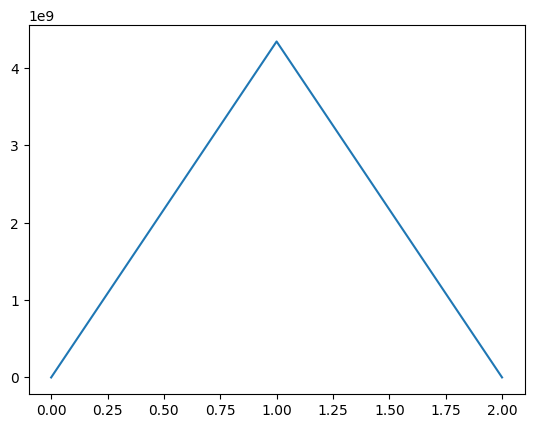

In [88]:
df['Populacao'].plot()

<Axes: title={'center': 'População X Classificação'}, xlabel='Populacao', ylabel='Classificacao'>

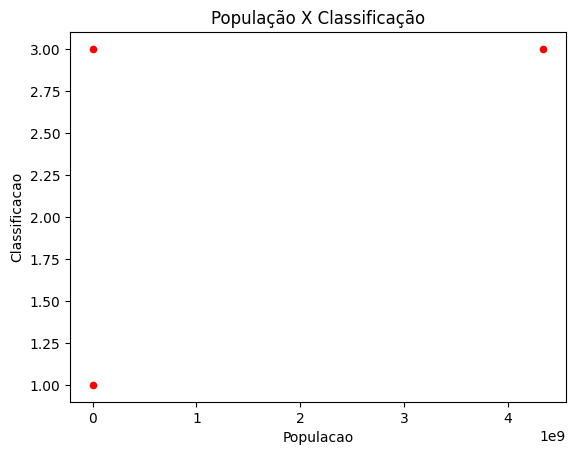

In [84]:
df.plot(x='Populacao', y='Classificacao', kind='scatter', title='População X Classificação', color='r')

### CSV e Excel

In [89]:
# Gravar CSV
df.to_csv('teste.csv')

In [90]:
df3 = pd.read_csv('teste.csv', encoding='UTF-8')
df3

,Unnamed: 0,Pais,Capital,Populacao,Classificacao,IDH
0,0,Belgica,Bruxelas,12312,1,True
1,1,India,Nova Delhi,4343345435,3,n/A
2,2,Brasil,Brasilia,854521,3,n/A


In [99]:
# Gravar Excel
# !pip install openpyxl
df.to_excel('teste.xlsx')

In [100]:
plan = pd.read_excel('teste.xlsx','Sheet1')

In [101]:
plan

,Unnamed: 0,Pais,Capital,Populacao,Classificacao,IDH
0,0,Belgica,Bruxelas,12312,1,True
1,1,India,Nova Delhi,4343345435,3,n/A
2,2,Brasil,Brasilia,854521,3,n/A


# EDA
### Exploratory Data Analysis

1. Entender os dados
2. Limpar os dados
3. Analisar o relacionamento entre as variáveis

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [107]:
df = pd.read_csv('StudentsPerformance.csv')

## Fase 1 - Entendimento dos Dados

In [110]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [111]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [112]:
df.head().T

,0,1,2,3,4
gender,female,female,female,male,male
race/ethnicity,group B,group C,group B,group A,group C
parental level of education,bachelor's degree,some college,master's degree,associate's degree,some college
lunch,standard,standard,standard,free/reduced,standard
test preparation course,none,completed,none,none,none
math score,72,69,90,47,76
reading score,72,90,95,57,78
writing score,74,88,93,44,75


In [113]:
print("Tamanho:", df.shape)
print("Colunas:", df.columns)

Tamanho: (1000, 8)
Colunas: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [115]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


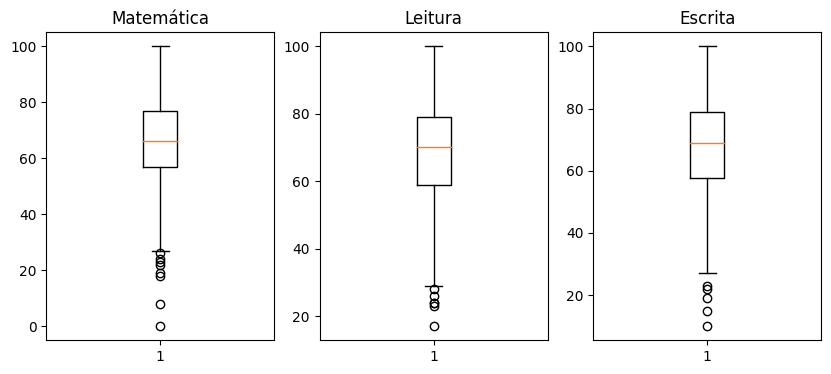

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].boxplot(df['math score'])
axes[0].set_title('Matemática')
axes[1].boxplot(df['reading score'])
axes[1].set_title('Leitura')
axes[2].boxplot(df['writing score'])
axes[2].set_title('Escrita')
plt.show()

In [125]:
x = df.iloc[:, 5:8].values
print(x)

[[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]


In [126]:
pd.options.display.float_format = '{:.1f}'.format
xDF = pd.DataFrame(x)
xDF.head()

,0,1,2
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [128]:
z = xDF.describe()
z.head(10)

,0,1,2
count,1000.0,1000.0,1000.0
mean,66.1,69.2,68.1
std,15.2,14.6,15.2
min,0.0,17.0,10.0
25%,57.0,59.0,57.8
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [129]:
for t in z:
    iqr = z[t][6] - z[t][4]
    extMenor = z[t][4] - (iqr * 1.5)
    extMaior = z[t][6] + (iqr * 1.5)
    print('Na col. %d devem estar abaixo de %.2f e acima de %.2f' % (t, extMenor, extMaior))

Na col. 0 devem estar abaixo de 27.00 e acima de 107.00
Na col. 1 devem estar abaixo de 29.00 e acima de 109.00
Na col. 2 devem estar abaixo de 25.88 e acima de 110.88


In [133]:
matematica = x[: 0]
matOutlier = (x[:,0] < 27.0)
df[matOutlier]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23
